In [1]:
from time import time
import sys
import pandas as pd
import csv
import re
from langdetect import detect

def my_detect(row):
    if(len(str(row).split()) > 12):
        try:
            language = detect(row)
            return language
        except:
            language = "error"
            return 'unknown'
    return 'de'        



df = pd.read_csv('OMTGeschichten1_bearb.txt', sep = ";" , quoting = csv.QUOTE_NONE,
                            names = ["#","Answers", "Class", "Subclass"
                                    ]
                           )
df = df.dropna(axis = 0)

print('before cleaning...\n')
print(df.info(), "\n")
print(df["Class"].value_counts(), "\n")
#Motive F is basicly a sub-motive from M and therefore not further used as indipendent motive
df["Class"] = df["Class"].replace(["F"],["M"])
print(df.info(), "\n")
print(df["Class"].value_counts(), "\n")

df = df.dropna(axis = 0)
#delete potentially wrong labels ('\N' seems to accure from time to time)
df = df.drop(df[df.Class == '\\N'].index)
df['Answers'] = df['Answers'].replace(to_replace = r'([a-zA-Z])(\.|\/)([a-zA-Z])', value= r'\1\2 \3', regex=True)
df['answer_len'] = df['Answers'].astype(str).apply(len)
df['word_count'] = df['Answers'].apply(lambda x: len(str(x).split()))
df['language'] = df['Answers'].apply(my_detect)


print("After Cleaning")
print(df.info(), "\n")
print(df["Class"].value_counts(), "\n")
print(df.head())
df.describe().T


before cleaning...

<class 'pandas.core.frame.DataFrame'>
Int64Index: 209906 entries, 0 to 209905
Data columns (total 4 columns):
#           209906 non-null object
Answers     209906 non-null object
Class       209906 non-null object
Subclass    209906 non-null object
dtypes: object(4)
memory usage: 8.0+ MB
None 

M     85946
L     40995
F     37604
A     35419
0      9929
\N       13
Name: Class, dtype: int64 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 209906 entries, 0 to 209905
Data columns (total 4 columns):
#           209906 non-null object
Answers     209906 non-null object
Class       209906 non-null object
Subclass    209906 non-null object
dtypes: object(4)
memory usage: 8.0+ MB
None 

M     123550
L      40995
A      35419
0       9929
\N        13
Name: Class, dtype: int64 

After Cleaning
<class 'pandas.core.frame.DataFrame'>
Int64Index: 209893 entries, 0 to 209905
Data columns (total 7 columns):
#             209893 non-null object
Answers       209893 non-null o

,count,mean,std,min,25%,50%,75%,max
answer_len,209893.0,145.769673,74.928263,4.0,90.0,130.0,187.0,543.0
word_count,209893.0,22.153011,12.037903,1.0,13.0,20.0,29.0,99.0


In [2]:
%store df

Stored 'df' (DataFrame)


In [3]:
isGerman = df['language']=='de'
df_German = df[isGerman]
print(df_German.describe().T)
print()
print(df_German['Class'].value_counts())
print()
print(df_German.head())

               count        mean        std  min   25%    50%    75%    max
answer_len  209399.0  145.753910  74.932951  4.0  90.0  130.0  187.0  543.0
word_count  209399.0   22.144943  12.033364  1.0  13.0   20.0   29.0   97.0

M    123244
L     40899
A     35357
0      9899
Name: Class, dtype: int64

                            #  \
0    185124138106620081063215   
1    185124138106620081063215   
2    185124138106620081063215   
3  52122529750377312346781011   
4  52122529750377312346781011   

                                             Answers Class Subclass  \
0  ignoranz den anderen gegenüber. schlecht. die ...     M        5   
1  mitlachen, mit eingeschlossen zu werden. sie l...     A        5   
2  den anderen Umamen, ehrlichkeit, vertrauen. gu...     A        1   
3  Sie hält die andere Person, stütz sie. Gut. Si...     M        1   
4  Entspannung, Spaß zu haben. Sie albern herum. ...     A        2   

   answer_len  word_count language  
0         198          30       d

In [1]:
%store -r df_German 

In [ ]:
isForeign = df['language']!='de'
df_Foreign = df[isForeign]
print(df_Foreign.describe().T)
print(df_Foreign['language'].value_counts())
print(df_Foreign['Answers'])

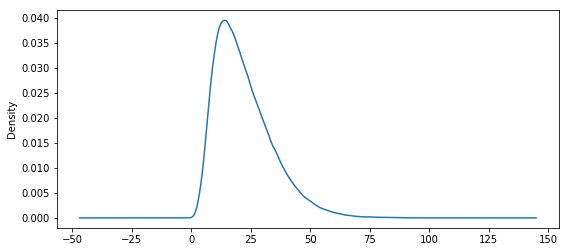

In [4]:
plot = df_German['word_count'].sort_index().plot(figsize= (9,4), kind='kde')
fig = plot.get_figure()
fig.savefig("length_density.png")

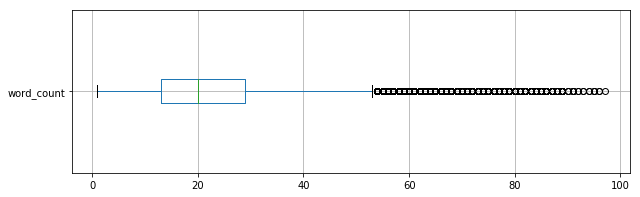

In [6]:
import matplotlib.pyplot as plt
plot2= df_German.boxplot(column='word_count',figsize =(10,3), vert=False)
fig2 = plot2.get_figure()
fig2.savefig("whiskers.png")

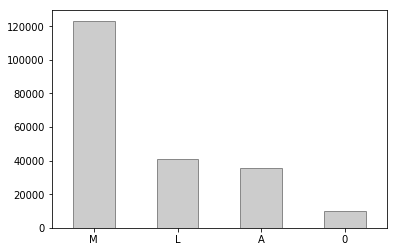

In [12]:
import matplotlib.pyplot as plt
import numpy as np

plot3 = df_German['Class'].value_counts().plot.bar( align = 'center', color = ["grey", "grey", "grey", "grey"], alpha=0.4, edgecolor= "black", rot = 0)
fig3 = plot3.get_figure()
fig3.savefig("classes.png")

In [8]:
%whos

Variable     Type                          Data/Info
----------------------------------------------------
csv          module                        <module 'csv' from 'C:\\U<...>cation_omt\\lib\\csv.py'>
detect       function                      <function detect at 0x000002DE1E662A60>
df           DataFrame                                              <...>[209893 rows x 7 columns]
df_Foreign   DataFrame                                              <...>n\n[494 rows x 7 columns]
df_German    DataFrame                                              <...>[209399 rows x 7 columns]
isForeign    Series                        0         False\n1       <...>ngth: 209893, dtype: bool
isGerman     Series                        0         True\n1        <...>ngth: 209893, dtype: bool
my_detect    function                      <function my_detect at 0x000002DE0E3CFBF8>
np           module                        <module 'numpy' from 'C:\<...>ges\\numpy\\__init__.py'>
pd           module             

In [10]:
%store df_German

Stored 'df_German' (DataFrame)


In [11]:
from sklearn.model_selection import train_test_split

df_German_train, df_German_test = train_test_split(df_German, test_size = 0.3, stratify = df_German['Class'])

In [26]:
df_German_train.shape

(146579, 7)

In [25]:
df_German_train.to_csv(path_or_buf='df_German_train.csv' , sep = ';')

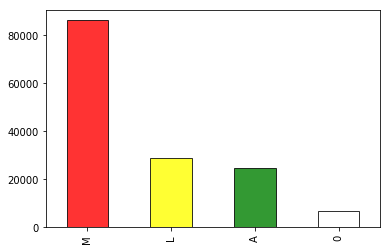

In [12]:
df_German_train['Class'].value_counts().plot.bar( align = 'center', color = ["red", "yellow", "green", "white"], alpha=0.8, edgecolor= "black", )

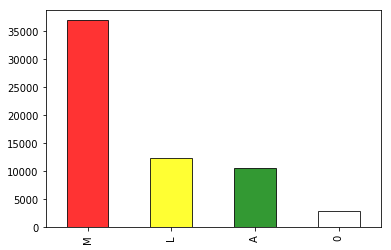

In [13]:
df_German_test['Class'].value_counts().plot.bar( align = 'center', color = ["red", "yellow", "green", "white"], alpha=0.8, edgecolor= "black", )

In [16]:
print(df_German_train['Class'].value_counts())
print(df_German_train.info())
print()
print(df_German_test['Class'].value_counts())
print(df_German_test.info())

M    86271
L    28629
A    24750
0     6929
Name: Class, dtype: int64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 146579 entries, 181494 to 24861
Data columns (total 7 columns):
#             146579 non-null object
Answers       146579 non-null object
Class         146579 non-null object
Subclass      146579 non-null object
answer_len    146579 non-null int64
word_count    146579 non-null int64
language      146579 non-null object
dtypes: int64(2), object(5)
memory usage: 8.9+ MB
None

M    36973
L    12270
A    10607
0     2970
Name: Class, dtype: int64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 62820 entries, 63231 to 122317
Data columns (total 7 columns):
#             62820 non-null object
Answers       62820 non-null object
Class         62820 non-null object
Subclass      62820 non-null object
answer_len    62820 non-null int64
word_count    62820 non-null int64
language      62820 non-null object
dtypes: int64(2), object(5)
memory usage: 3.8+ MB
None


In [18]:
df_German_test.head()

,#,Answers,Class,Subclass,answer_len,word_count,language
63231,7991355074900595,belehren/ lehren. wissend. mehr lebenserfahrun...,M,3,205,27,de
104740,10251401874110511,"der Spaß in der Gruppe ist wichtig, sie schwim...",A,2,204,32,de
126042,11991426687900052M4,"Herausforderung, klettert einen Berg hinauf. S...",L,3,98,12,de
125817,4541425564219826M5,"sie delegiert eine Aufgabe an das Team, es ist...",M,4,179,29,de
135897,5781438587446101K,sich unterhalten. entspannt. wellness.,A,2,38,4,de


In [19]:
%store df_German_test
%store df_German_train

Stored 'df_German_test' (DataFrame)
Stored 'df_German_train' (DataFrame)


In [1]:
%store -r df_German_test
%store -r df_German_train

In [2]:
df_German_train.describe().T

,count,mean,std,min,25%,50%,75%,max
answer_len,146579.0,145.676714,74.954989,5.0,89.0,130.0,187.0,536.0
word_count,146579.0,22.130987,12.041271,1.0,13.0,20.0,29.0,97.0


In [3]:
df_German_train.to_csv(path_or_buf='omt_train_tab.csv', columns= ['Answers', 'Class'], sep='\t', index=False, header=None)

In [4]:
df_German_test.to_csv(path_or_buf='omt_test_tab.csv', columns= ['Answers', 'Class'], sep='\t', index=False, header=None)